In [31]:
import numpy as np
import matplotlib.pyplot as plt
import urllib, json
import requests
import pandas as pd
from adjustText import adjust_text
%matplotlib inline

In [2]:
def load_closest_defender_dataset(path):
    curr_file = open(path)
    json_data = json.load(curr_file)
    result_data = json_data['resultSets'][0]
    headers = result_data['headers']
    shots = result_data['rowSet']
    data_frame = pd.DataFrame(data=shots, columns=headers)
    return data_frame

In [3]:
very_tight_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_very_tight_defense.json")
tight_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_tight_defense.json")
open_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_open_defense.json")
wide_open_d = load_closest_defender_dataset("../Data/nba_closest_defenders/player_shots_wide_open_defense.json")
three_point_total = load_closest_defender_dataset("../Data/nba_closest_defenders/player_three_points_shots_total.json")

In [4]:
def add_total_three_pointers(data_frame):
    total_3_pointers = np.round(data_frame.FG3A * data_frame.GP)
    total_3_pointers = total_3_pointers.astype(np.int32)
    data_frame['FG3_TOTAL_SHOTS'] = total_3_pointers

In [5]:
add_total_three_pointers(very_tight_d)
add_total_three_pointers(tight_d)
add_total_three_pointers(open_d)
add_total_three_pointers(wide_open_d)

In [16]:
very_tight_top_20 = very_tight_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
tight_top_20 = tight_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
open_top_20 = open_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]
wide_open_top_20 = wide_open_d.sort_values(by='FG3_TOTAL_SHOTS', axis=0, ascending=False).iloc[:20, :]

In [78]:
top_20 = three_point_total.sort_values(by='FG3M_RANK', axis=0, ascending=True).iloc[:20]
player_ids = top_20.PLAYER_ID.tolist()
v_tight_t_20 = very_tight_d[very_tight_d.PLAYER_ID.isin(player_ids)]
v_tight_t_20

,PLAYER_ID,PLAYER_NAME,PLAYER_LAST_TEAM_ID,PLAYER_LAST_TEAM_ABBREVIATION,AGE,GP,G,FGA_FREQUENCY,FGM,FGA,...,EFG_PCT,FG2A_FREQUENCY,FG2M,FG2A,FG2_PCT,FG3A_FREQUENCY,FG3M,FG3A,FG3_PCT,FG3_TOTAL_SHOTS
5,202738,Isaiah Thomas,1610612738,BOS,28.0,76,75,0.215,1.88,4.16,...,0.468,0.188,1.75,3.63,0.482,0.027,0.13,0.53,0.250,40
6,201566,Russell Westbrook,1610612760,OKC,28.0,81,76,0.172,1.78,4.11,...,0.435,0.164,1.75,3.93,0.447,0.008,0.02,0.19,0.133,15
9,202689,Kemba Walker,1610612766,CHA,27.0,79,76,0.208,1.66,3.81,...,0.467,0.176,1.42,3.23,0.439,0.032,0.24,0.58,0.413,46
13,203468,CJ McCollum,1610612757,POR,25.0,80,79,0.203,1.58,3.65,...,0.449,0.187,1.45,3.36,0.431,0.016,0.13,0.29,0.435,23
16,203081,Damian Lillard,1610612757,POR,26.0,75,71,0.178,1.47,3.51,...,0.443,0.157,1.29,3.09,0.418,0.021,0.17,0.41,0.419,31
17,202681,Kyrie Irving,1610612739,CLE,25.0,72,68,0.178,1.65,3.50,...,0.478,0.169,1.61,3.33,0.483,0.008,0.04,0.17,0.250,12
44,201935,James Harden,1610612745,HOU,27.0,81,75,0.139,1.17,2.63,...,0.472,0.116,1.04,2.19,0.475,0.024,0.14,0.44,0.306,36
54,200768,Kyle Lowry,1610612761,TOR,31.0,59,52,0.162,1.14,2.47,...,0.476,0.138,1.05,2.10,0.500,0.024,0.08,0.37,0.227,22
70,202331,Paul George,1610612754,IND,27.0,74,67,0.126,1.12,2.26,...,0.503,0.120,1.09,2.15,0.509,0.006,0.03,0.11,0.250,8
74,203078,Bradley Beal,1610612764,WAS,24.0,77,66,0.131,0.97,2.22,...,0.442,0.125,0.96,2.13,0.451,0.005,0.01,0.09,0.143,7


In [59]:
def plot_data_frame(data_frame, type_of_defense):    
    plt.figure(figsize=(13, 13))
    plt.scatter(x=data_frame.FG3_TOTAL_SHOTS, y=data_frame.FG3_PCT)
    plt.xlabel(s="Number of three point attempts")
    plt.ylabel(s="3pt percentage")
    plt.title(s="3pt shooting on " + type_of_defense + " defense")
    texts = []
    for i in range(len(data_frame)):
        texts.append(plt.text(data_frame.iloc[i].FG3_TOTAL_SHOTS, data_frame.iloc[i].FG3_PCT, 
                 s = data_frame.iloc[i].PLAYER_NAME))

    adjust_text(texts, x=data_frame.FG3_TOTAL_SHOTS, y=data_frame.FG3_PCT,expand_points=(0.3, 0.3))

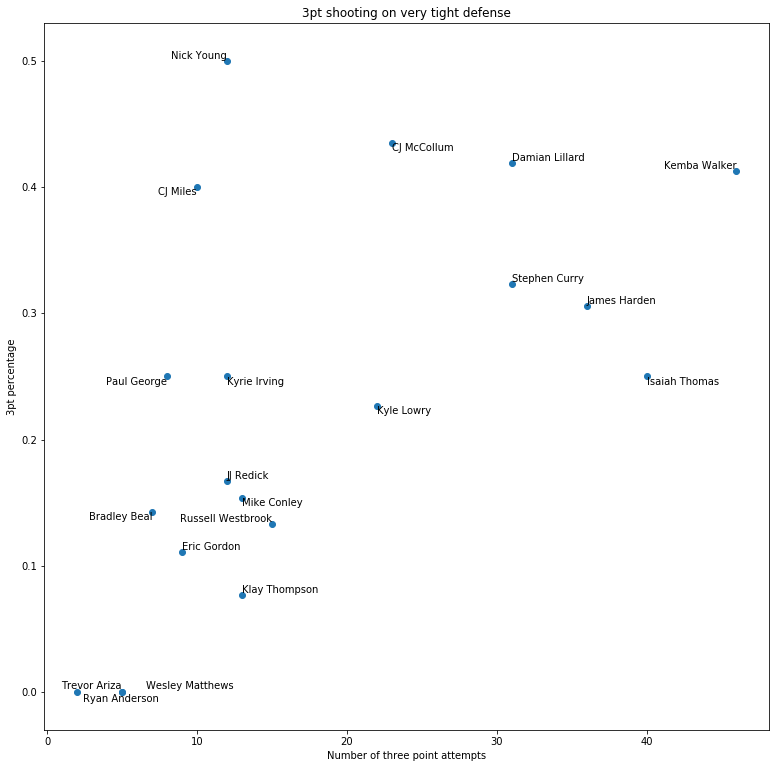

In [79]:
plot_data_frame(v_tight_t_20, "very tight")
#plot_data_frame(tight_top_20, "tight")
#plot_data_frame(open_top_20, "open")
#plot_data_frame(wide_open_top_20, "wide open")